In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
df.groupby('Pregnancies')['Glucose'].mean()

Pregnancies
0     123.000000
1     112.748148
2     110.796117
3     123.586667
4     125.117647
5     118.859649
6     120.800000
7     136.444444
8     131.736842
9     131.392857
10    120.916667
11    126.454545
12    113.555556
13    125.500000
14    137.500000
15    136.000000
17    163.000000
Name: Glucose, dtype: float64

In [8]:
df.groupby('Pregnancies')['Glucose'].median()

Pregnancies
0     119.0
1     109.0
2     108.0
3     116.0
4     123.0
5     116.0
6     114.5
7     136.0
8     122.0
9     132.0
10    118.5
11    135.0
12    106.0
13    127.5
14    137.5
15    136.0
17    163.0
Name: Glucose, dtype: float64

In [9]:
df.groupby('Pregnancies')['Glucose'].std()

Pregnancies
0     29.408719
1     33.642040
2     26.075817
3     33.539849
4     27.686157
5     32.955835
6     34.751009
7     34.458510
8     37.772923
9     31.582155
10    28.612732
11    20.171086
12    25.219591
13    27.040094
14    53.033009
15          NaN
17          NaN
Name: Glucose, dtype: float64

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
df.value_counts('Glucose')

Glucose
99     17
100    17
129    14
125    14
106    14
       ..
169     1
61      1
178     1
177     1
199     1
Name: count, Length: 136, dtype: int64

In [12]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [14]:
x.shape,x_train.shape,x_test.shape

((768, 8), (614, 8), (154, 8))

In [15]:
classifier=svm.SVC(kernel='linear')

In [16]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
y_train_prediction = classifier.predict(x_train)
training_data_accuracy=accuracy_score(y_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7752442996742671


In [20]:
y_test_predection=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(y_test_predection,y_test)
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 0.7727272727272727


In [21]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrix- svm\xa0Classifier\xa0')

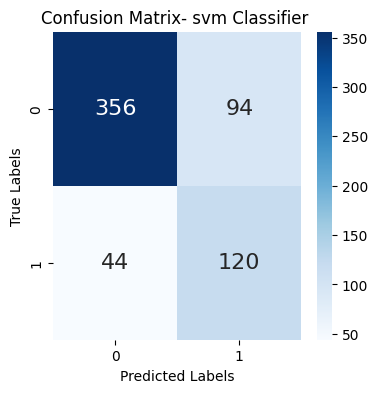

In [ ]:
cm_train=confusion_matrix(y_train_prediction, y_train)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')